# Температуры SIT за декабрь 2020

In [2]:
!pwd
!date
#!ls

/home/alena/SCIENCE/SIT/Analysis/Telemetry
Сб янв  9 00:30:19 MSK 2021


In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
from matplotlib import dates
import datetime as dt

In [4]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3.5
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 14

In [5]:
filename = "2020_12_all_dbg_params.dat"
data = pd.read_csv(filename, index_col=None, sep='\s+')
print(data.shape)
print(data.columns)
data.head()

(35923, 19)
Index(['year', 'month', 'day', 'time', 'P0', 'T0', 'P1', 'T1', 'Tmos', 'Umos',
       'Imos', 'Tpow', 'U5', 'Uac', 'Icom', 'Tbot', 'Ttop', 'Num', 'flight'],
      dtype='object')


,year,month,day,time,P0,T0,P1,T1,Tmos,Umos,Imos,Tpow,U5,Uac,Icom,Tbot,Ttop,Num,flight
0,2020,11,29,03:51:20,96.15,24.5,96.03,-22.9,-12.4,0.0,0.000,34.00,5.15,18.92,0.89,21.9,21.7,1.0,1129.0
1,2020,11,29,03:51:21,96.15,24.5,96.02,-22.9,-12.4,0.0,0.000,34.00,5.15,18.92,0.89,21.9,21.7,2.0,1129.0
2,2020,11,29,03:52:22,96.15,24.5,96.02,-22.9,-12.4,0.0,-0.005,34.00,5.15,18.91,1.00,21.9,21.8,3.0,1129.0
3,2020,11,29,03:53:23,96.14,24.5,96.02,-22.9,-12.4,0.0,0.000,34.25,5.15,18.92,0.95,21.9,21.7,4.0,1129.0
4,2020,11,29,03:54:24,96.15,24.5,96.01,-22.9,-12.4,0.0,0.010,34.00,5.16,18.92,0.89,22.1,21.7,5.0,1129.0


## Plot

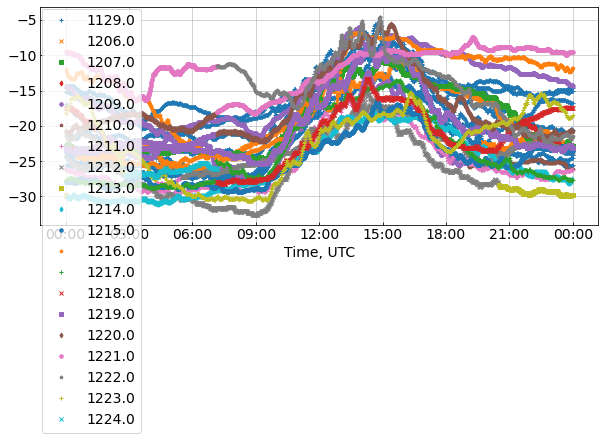

In [14]:
def plot_by_days(array, param, axistext, titletext=''):
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['+','x', 's', 'd', 'o', '*']
    #plcol = ['+-','x-', 's-', 'd-', 'o-', '*-']
    #plcol = ['m+','bx', 'gs', 'rd', 'co', 'y*']
    #plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-', 'k*-']
    minev = 548075 # 540159

    data = array
    if param == 'summ':
        data = data[(data[param] > 0) & (data[param] < 20000)]
    i = 0
    fig, ax = plt.subplots(figsize=(10,4))

    for key, grp in data.groupby(['flight']):
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        ax.plot(x, y, plcol[i%len(plcol)], label=key)
        #ax.plot(x, y, label=key)
        i += 1

    plt.xlabel("Time, UTC")
    plt.ylabel(axistext)
    ax.xaxis.set_major_formatter(fmt)
    ax.set_title(titletext)
    #plt.ylim(0.30, 0.75)
    #plt.xlim()
    plt.legend(borderaxespad=0.1)
    plt.grid()
    #plt.savefig("sit_current_2020_12.png", dpi=300,  bbox_inches='tight')
    
plot_by_days(data, "T1", "") 

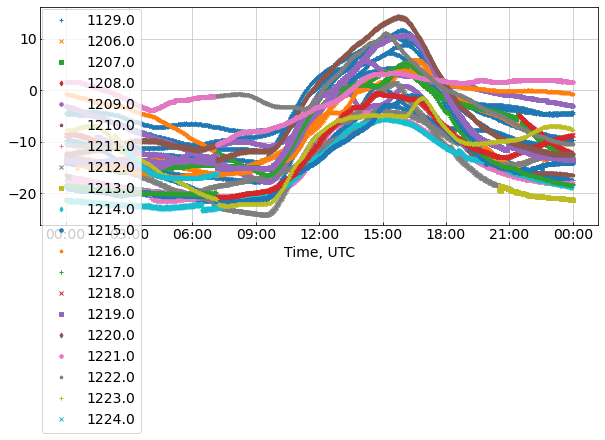

In [8]:
plot_by_days(data, "Tmos", "")    

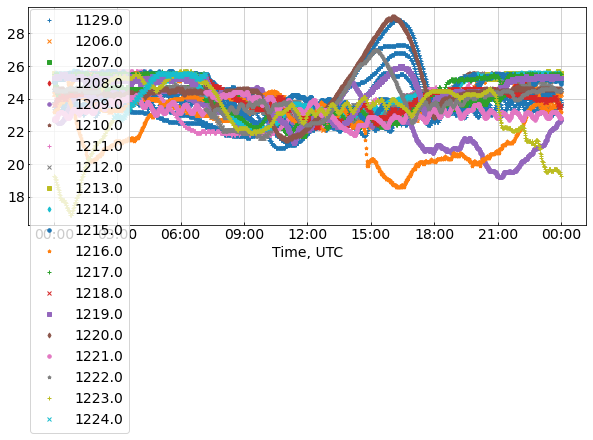

In [10]:
plot_by_days(data, "T0", "")    

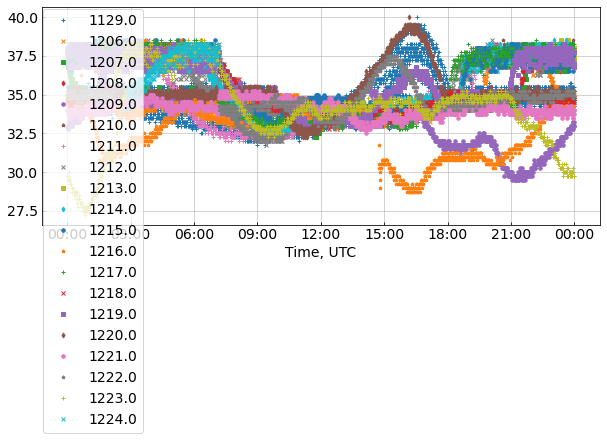

In [13]:
plot_by_days(data, "Tpow", "") 

## Температура на мозаике и на улице по дням

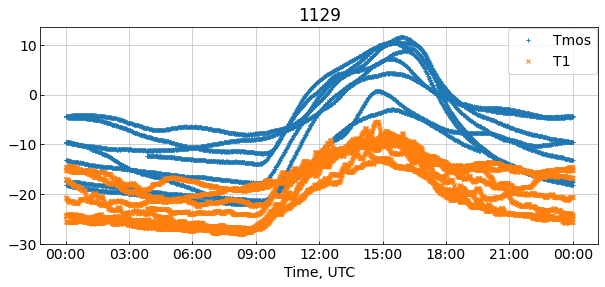

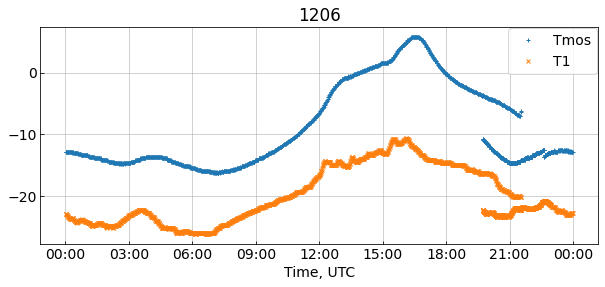

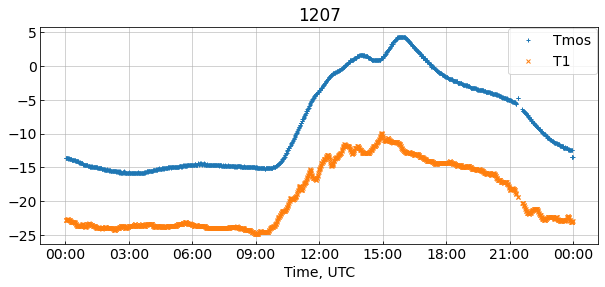

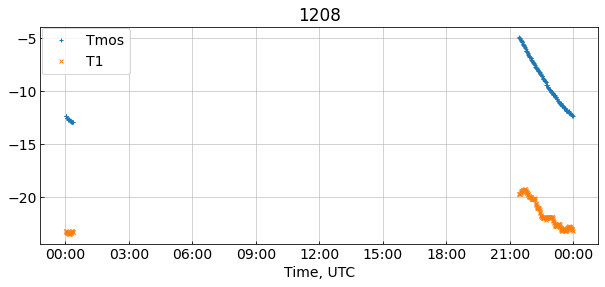

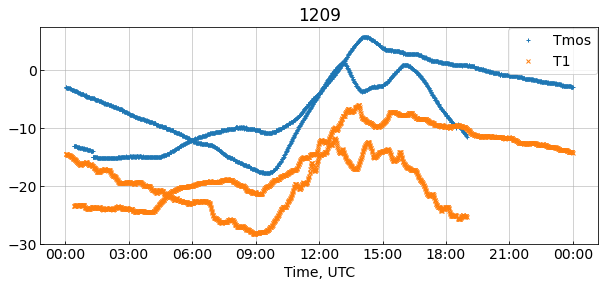

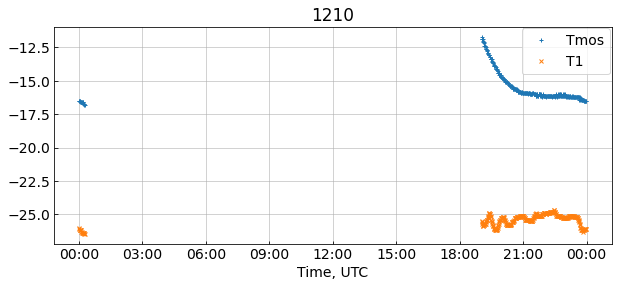

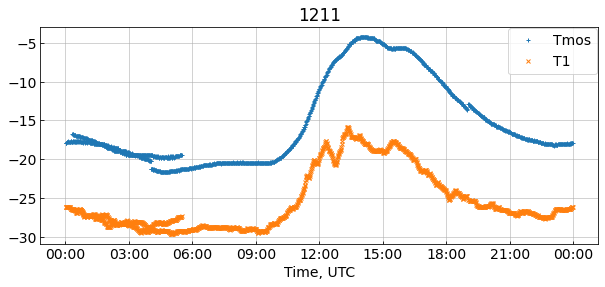

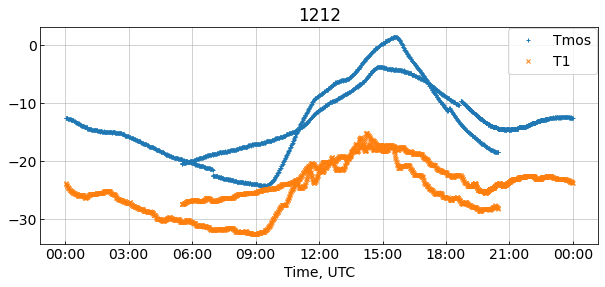

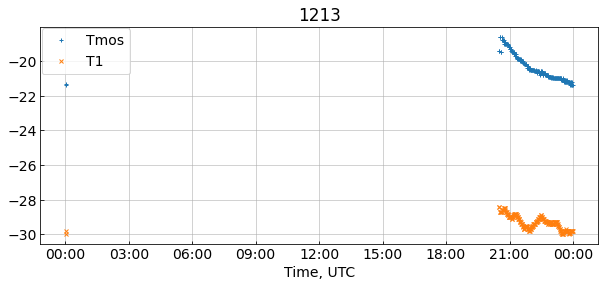

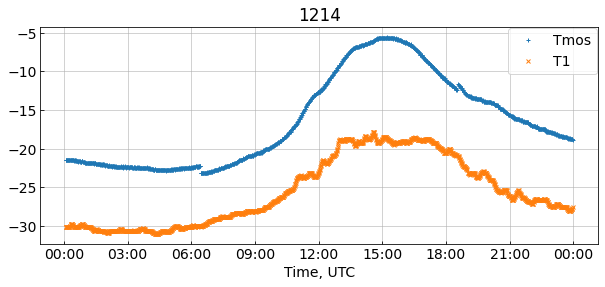

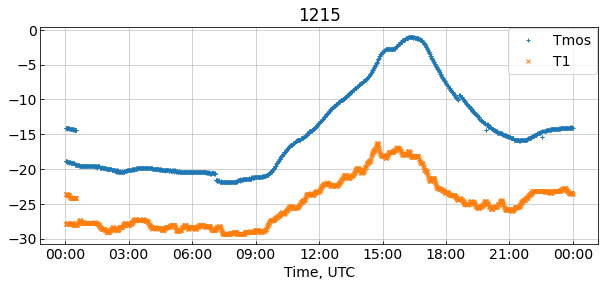

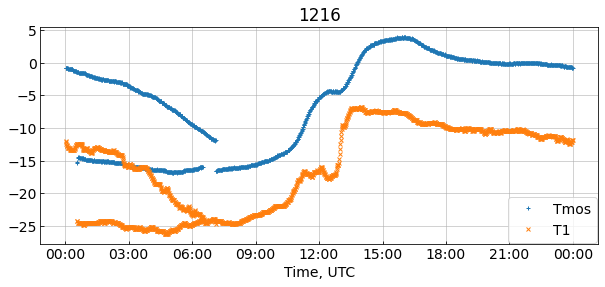

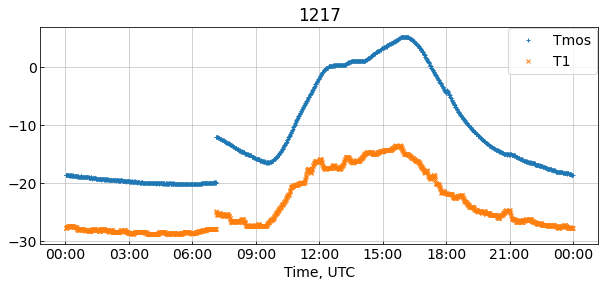

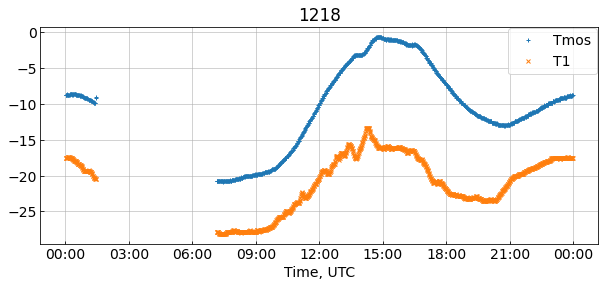

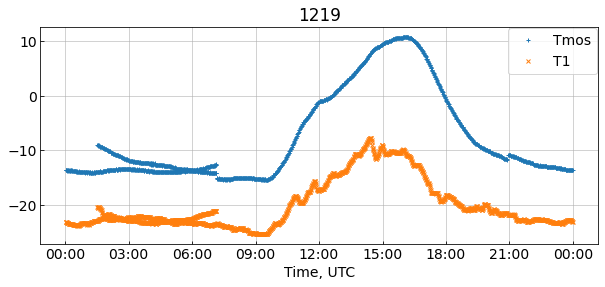

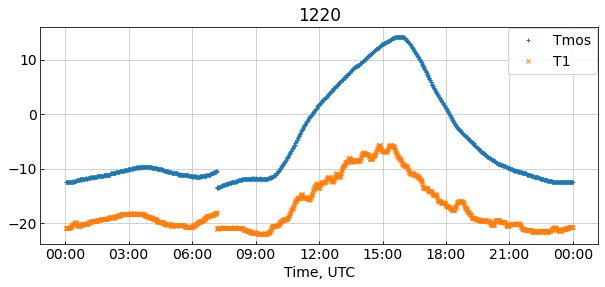

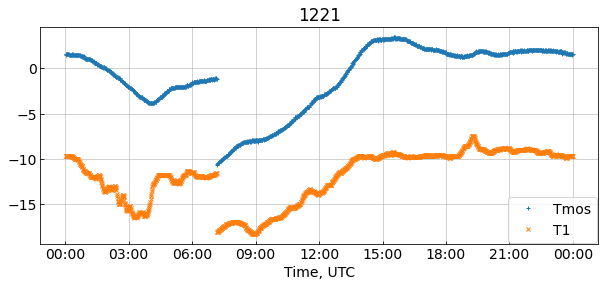

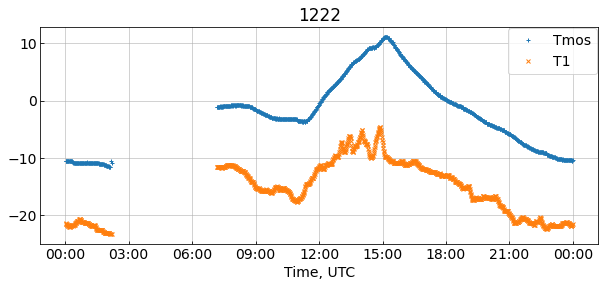

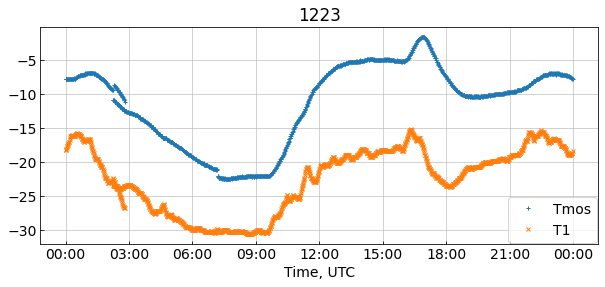

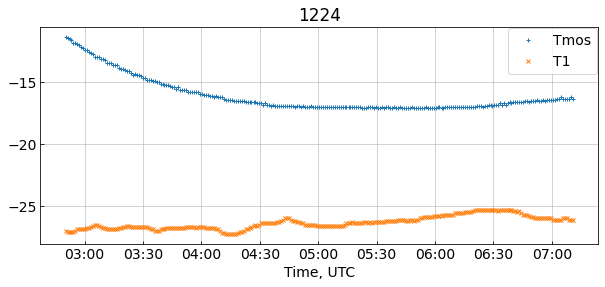

In [6]:
def plot_for_days(array, flight, axistext, titletext=''):
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['+','x', 's', 'd', 'o', '*']
    #plcol = ['+-','x-', 's-', 'd-', 'o-', '*-']
    #plcol = ['m+','bx', 'gs', 'rd', 'co', 'y*']
    #plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-', 'k*-']

    grp = array[array.flight == flight]
    i = 0
    fig, ax = plt.subplots(figsize=(10,4))

    for param in ['Tmos', 'T1']:
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        ax.plot(x, y, plcol[i%len(plcol)], label=param)
        i += 1

    plt.xlabel("Time, UTC")
    plt.ylabel(axistext)
    ax.xaxis.set_major_formatter(fmt)
    titletext = str(int(titletext))
    ax.set_title(titletext)
    #plt.ylim(0.30, 0.75)
    #plt.xlim()
    plt.legend(borderaxespad=0.1)
    plt.grid()
    #plt.savefig("Temperature_2020_" + titletext + ".png", dpi=300,  bbox_inches='tight')
    

for key, grp in (data.groupby(['flight'])):
    plot_for_days(grp, key, "", key)

# Разница температур

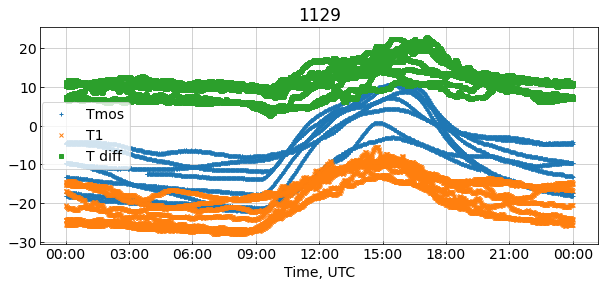

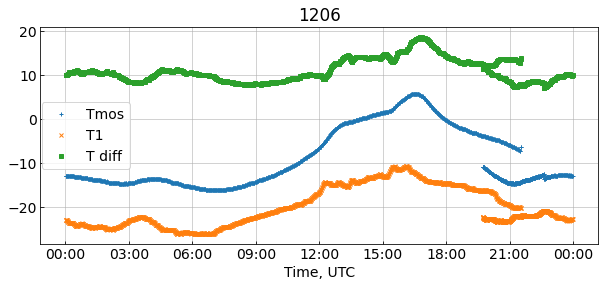

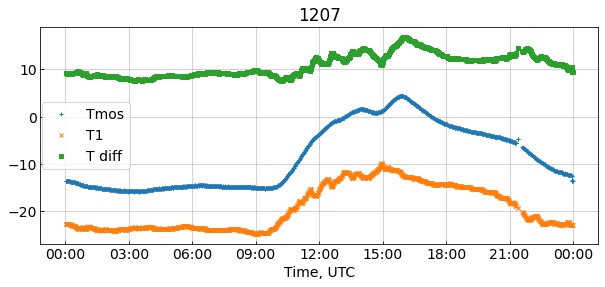

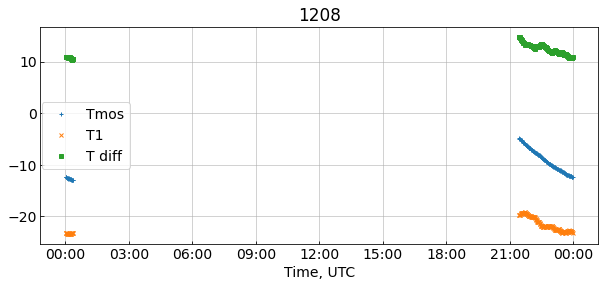

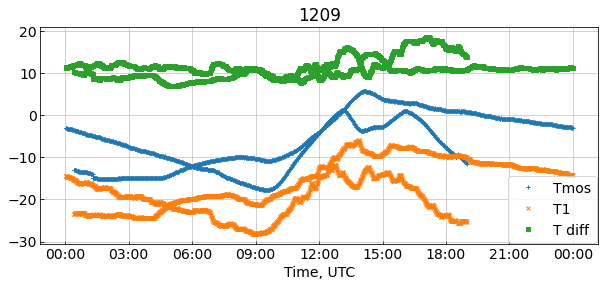

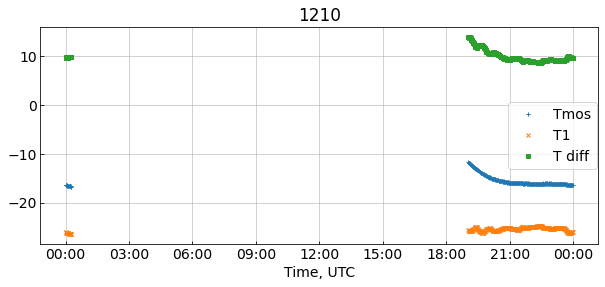

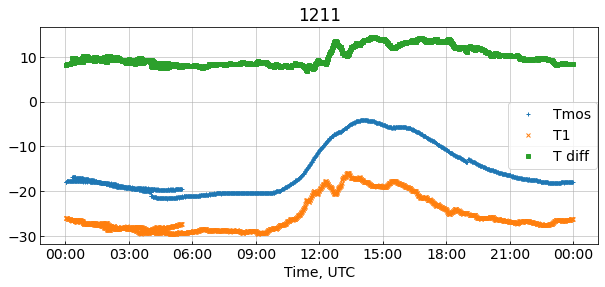

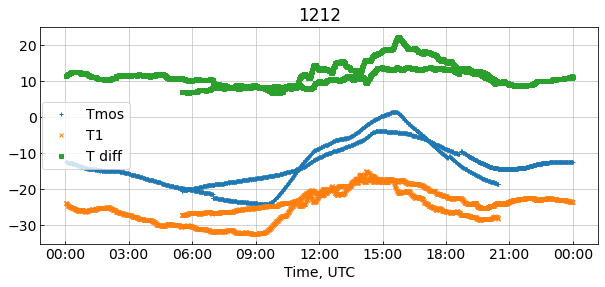

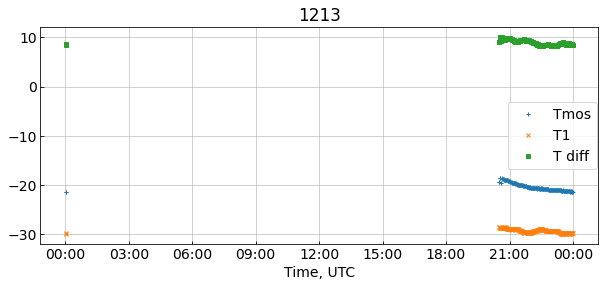

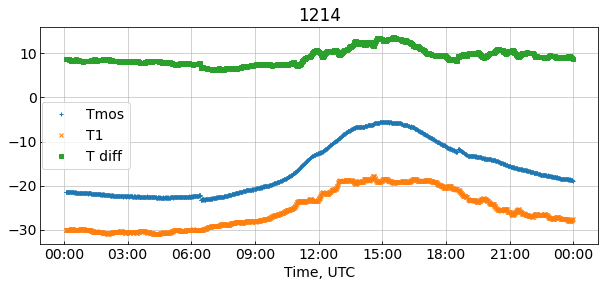

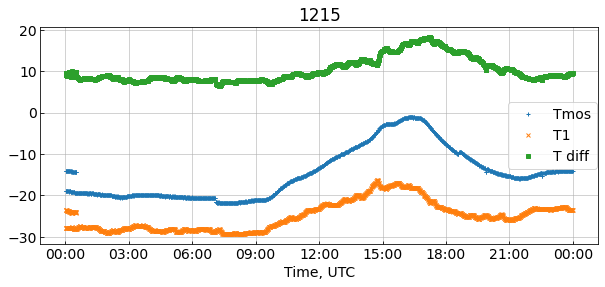

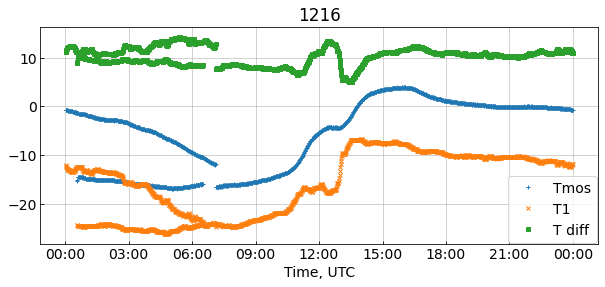

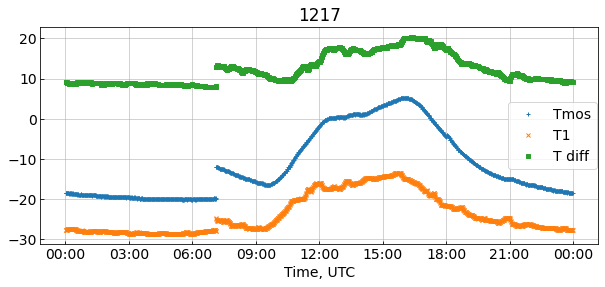

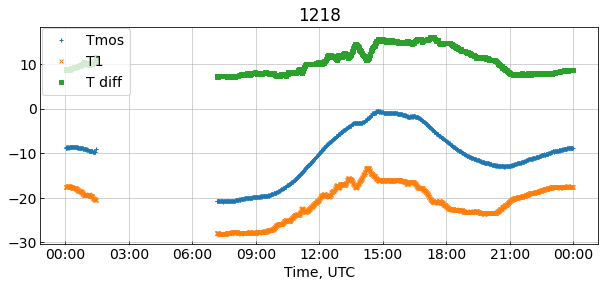

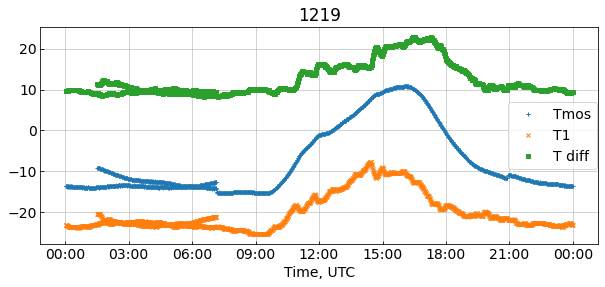

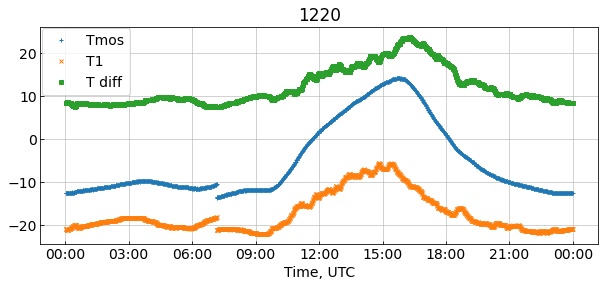

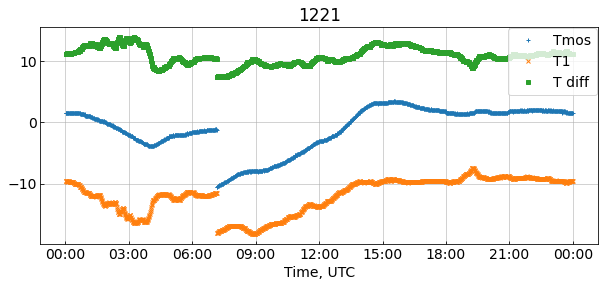

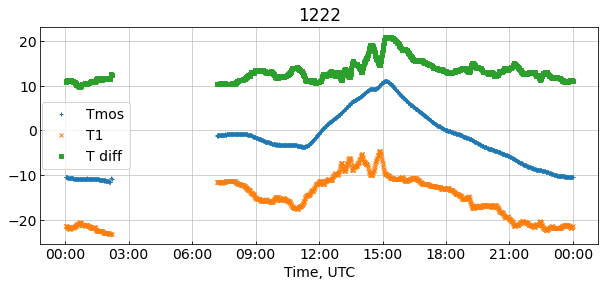

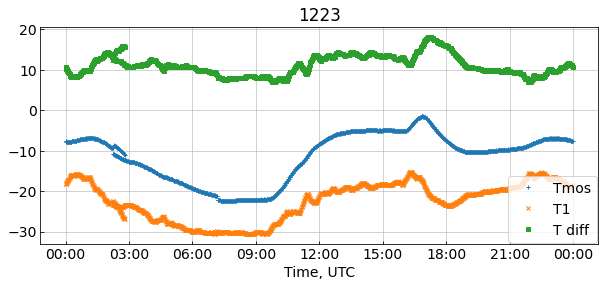

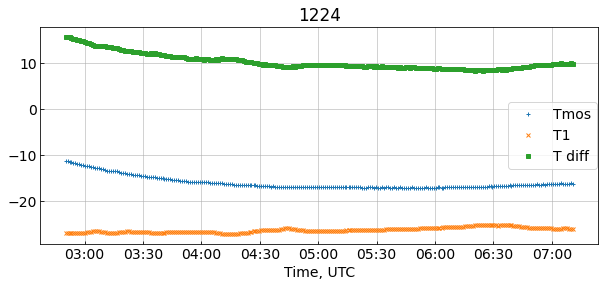

In [13]:
def plot_Tdiff_for_days(array, flight, axistext, titletext=''):
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['+','x', 's', 'd', 'o', '*']
    #plcol = ['+-','x-', 's-', 'd-', 'o-', '*-']
    #plcol = ['m+','bx', 'gs', 'rd', 'co', 'y*']
    #plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-', 'k*-']

    grp = array[array.flight == flight]
    i = 0
    fig, ax = plt.subplots(figsize=(10,4))

    for param in ['Tmos', 'T1']:
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        ax.plot(x, y, plcol[i%len(plcol)], label=param)
        i += 1

    x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
    y = grp['Tmos'] - grp['T1']
    ax.plot(x, y, plcol[i%len(plcol)], label="T diff")

    plt.xlabel("Time, UTC")
    plt.ylabel(axistext)
    ax.xaxis.set_major_formatter(fmt)
    titletext = str(int(titletext))
    ax.set_title(titletext)
    #plt.ylim(0.30, 0.75)
    #plt.xlim()
    plt.legend(borderaxespad=0.1)
    plt.grid()
    #plt.savefig("Temperature_2020_" + titletext + ".png", dpi=300,  bbox_inches='tight')
    

for key, grp in (data.groupby(['flight'])):
    plot_Tdiff_for_days(grp, key, "", key)

## Все температуры

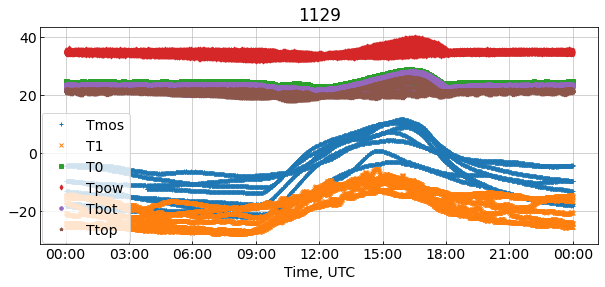

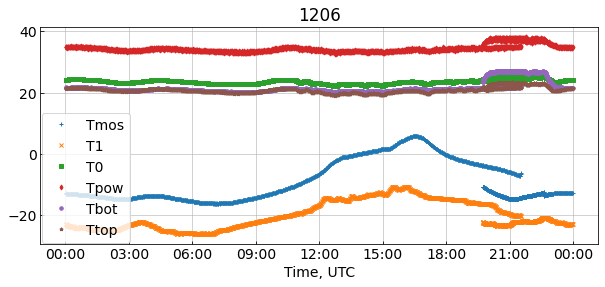

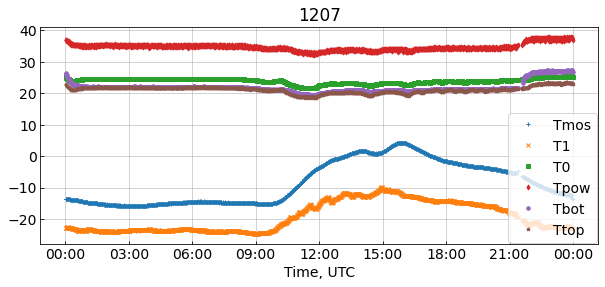

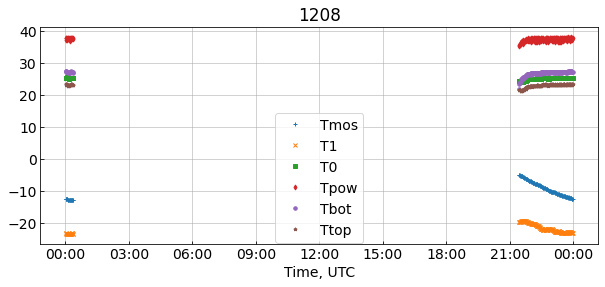

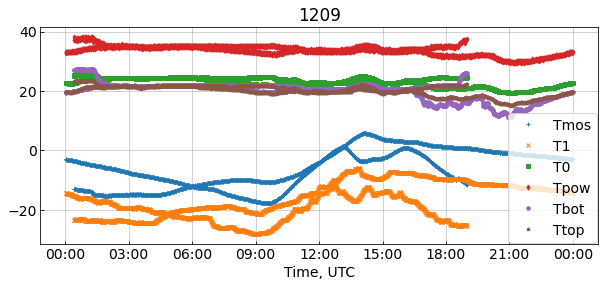

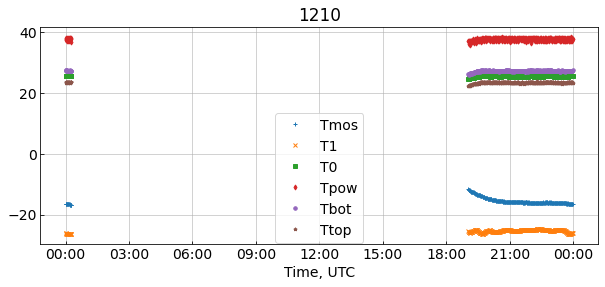

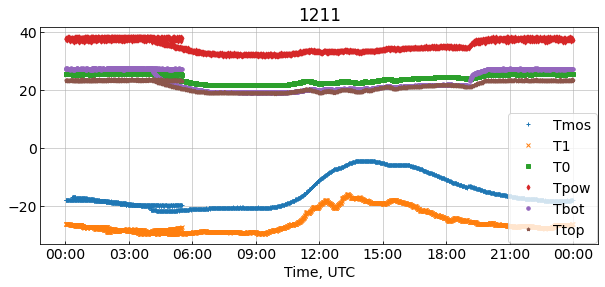

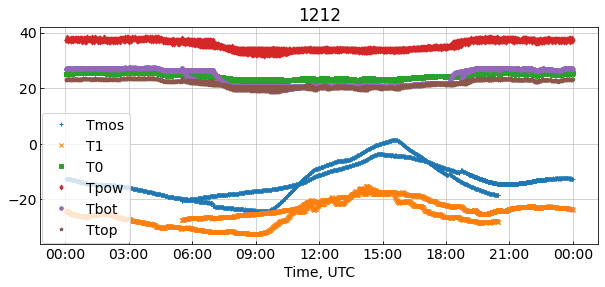

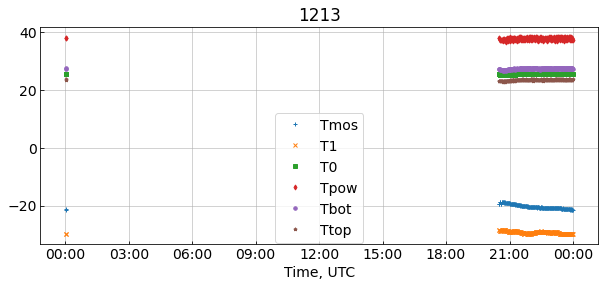

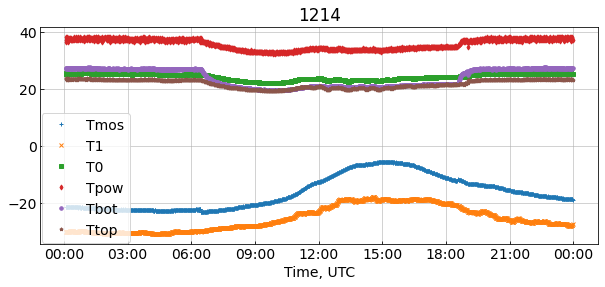

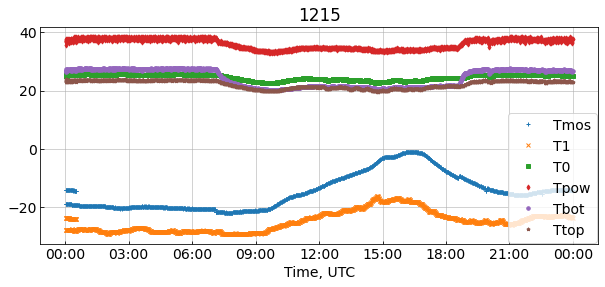

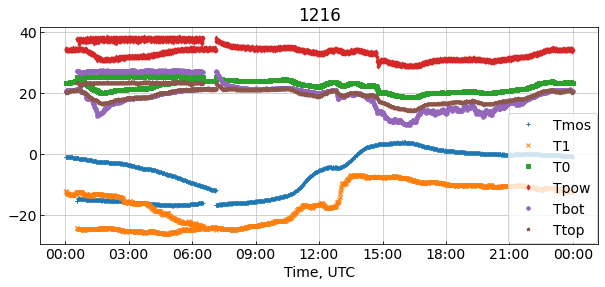

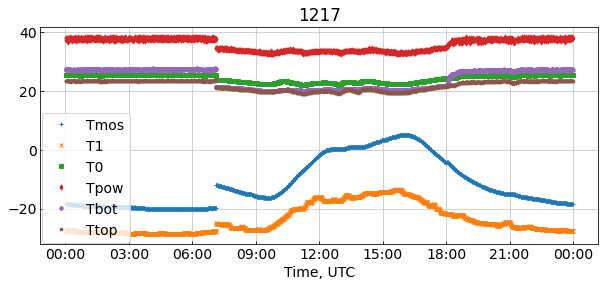

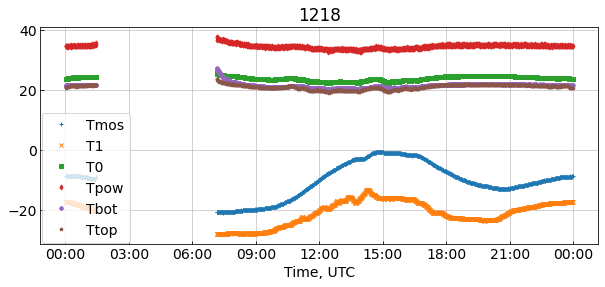

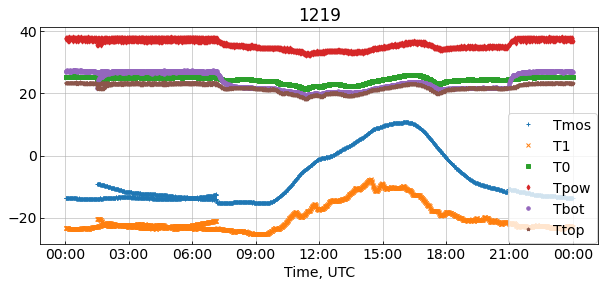

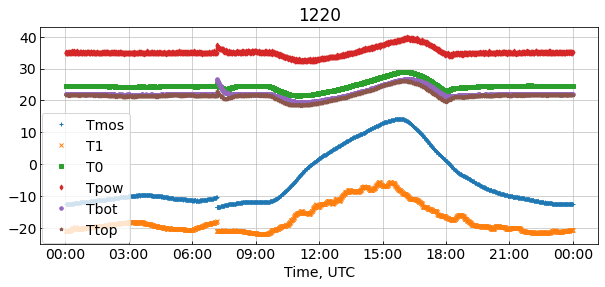

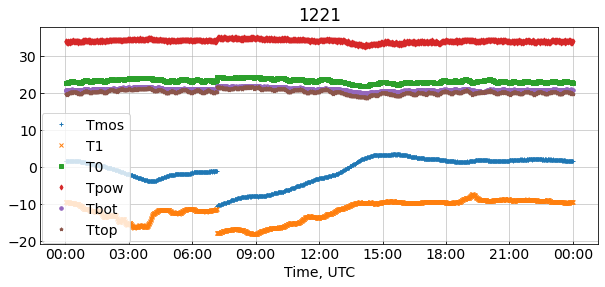

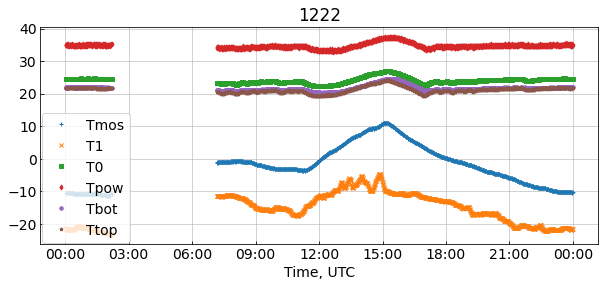

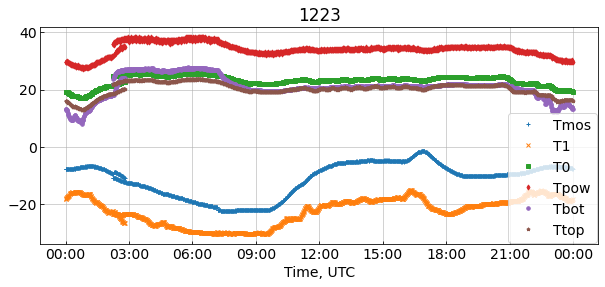

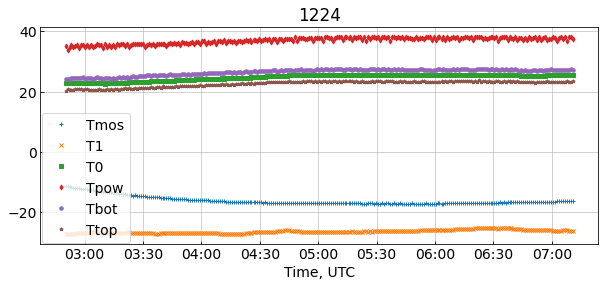

In [40]:
def plot_for_days(array, flight, axistext, titletext=''):
    fmt = dates.DateFormatter('%H:%M')
    plcol = ['+','x', 's', 'd', 'o', '*']
    #plcol = ['+-','x-', 's-', 'd-', 'o-', '*-']
    #plcol = ['m+','bx', 'gs', 'rd', 'co', 'y*']
    #plcol = ['m+-','bx--', 'gs:', 'rd-.', 'co-', 'k*-']

    grp = array[array.flight == flight]
    i = 0
    fig, ax = plt.subplots(figsize=(10,4))

    for param in ['Tmos', 'T1', 'T0', 'Tpow', 'Tbot', 'Ttop']:
        x = [dt.datetime.strptime(i, "%H:%M:%S") for i in (grp.time)]
        y = grp[param]
        ax.plot(x, y, plcol[i%len(plcol)], label=param)
        i += 1

    plt.xlabel("Time, UTC")
    plt.ylabel(axistext)
    ax.xaxis.set_major_formatter(fmt)
    titletext = str(int(titletext))
    ax.set_title(titletext)
    #plt.ylim(0.30, 0.75)
    #plt.xlim()
    plt.legend(borderaxespad=0.1)
    plt.grid()
    #plt.savefig("Temperature_2020_" + titletext + ".png", dpi=300,  bbox_inches='tight')
    

for key, grp in (data.groupby(['flight'])):
    plot_for_days(grp, key, "", key)